In [11]:
from fastai.vision.all import *
from fastcore.foundation import L
import torch
import matplotlib.pyplot as plt

def visualize_average_masks(mask_folder, label_classes, save_path=None):
    """
    Generates and displays an image showing the average mask for each class in grayscale.
    
    Parameters:
        mask_folder (str): Path to the folder containing segmentation masks.
        label_classes (list): List of class labels.
        save_path (str, optional): Path to save the output visualization.
        
    Returns:
        None
    """
    num_classes = len(label_classes)

    # Assign grayscale intensities (background = 0, other classes = increasing shades of gray)
    gray_shades = torch.linspace(0.2, 1.0, steps=num_classes)  # Avoid pure black (0) for foreground classes

    # Load mask files
    mask_files = get_image_files(mask_folder)
    if not mask_files:
        print("No mask files found in the directory!")
        return
    
    mask_sums = {label: None for label in label_classes}
    mask_counts = {label: 0 for label in label_classes}

    # Process masks
    first_valid_mask = None  # Placeholder to get shape

    for mask_file in progress_bar(mask_files):
        mask = TensorImage(PILMask.create(mask_file))  # Load mask as tensor
        
        if first_valid_mask is None:
            first_valid_mask = mask  # Store first valid mask to determine image shape

        for class_idx, class_label in enumerate(label_classes):
            class_mask = (mask == class_idx).float()  # Binary mask for each class

            if mask_sums[class_label] is None:
                mask_sums[class_label] = torch.zeros_like(mask, dtype=torch.float32)

            mask_sums[class_label] += class_mask
            mask_counts[class_label] += 1

    if first_valid_mask is None:
        print("No valid masks were processed!")
        return

    # Create a figure to display grayscale class-wise average masks
    fig, axes = plt.subplots(1, num_classes, figsize=(num_classes * 4, 4))

    if num_classes == 1:
        axes = [axes]  # Ensure iterable when only one class exists

    for ax, (class_idx, class_label) in zip(axes, enumerate(label_classes)):
        if mask_counts[class_label] > 0:
            avg_mask = mask_sums[class_label] / mask_counts[class_label]  # Normalize
            gray_mask = avg_mask * gray_shades[class_idx]  # Apply grayscale intensity

            ax.imshow(gray_mask.cpu().numpy(), cmap="gray", vmin=0, vmax=1)
            ax.set_title(f"Class: {class_label}")
            ax.axis("off")

    plt.tight_layout()

    # Save the figure if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)

    plt.show()

# Example usage
# visualize_average_masks("dataset/labeled_data/masks", ["background", "anterior", "posterior"], save_path="average_masks.png")

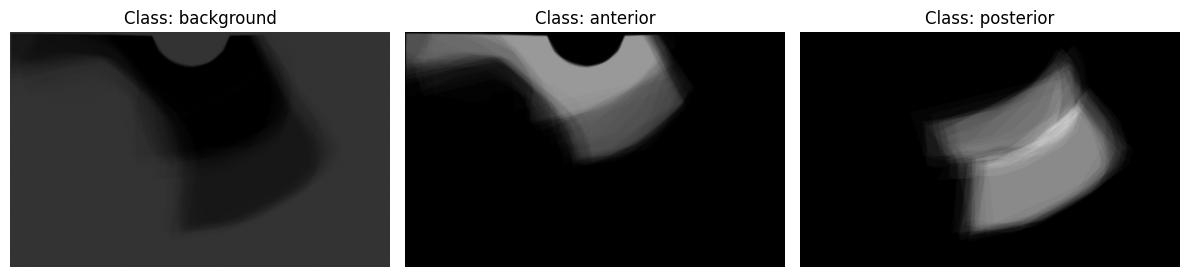

In [14]:
# Example usage
visualize_average_masks("dataset/labeled_data/labels", ["background", "anterior", "posterior"], save_path="labeled_average_masks.png")

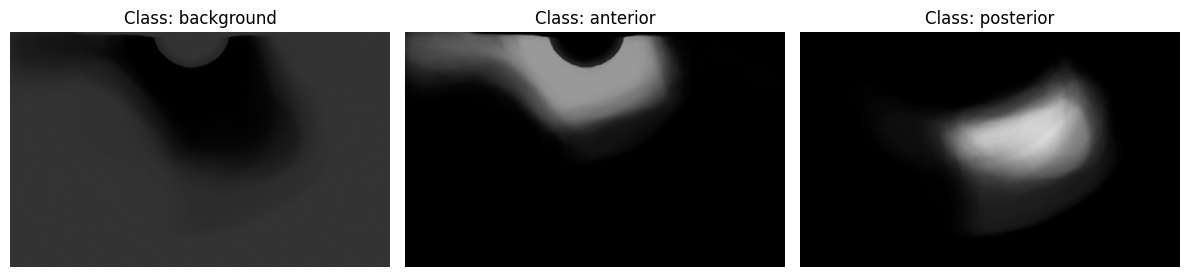

In [15]:
visualize_average_masks("dataset/unlabeled_data/labels", ["background", "anterior", "posterior"], save_path="unlabeled_average_masks.png")